## Questão 1

## Questão 2

Seja a ativação sigmoid:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
onde $z = \mathbf{w}^\top \mathbf{x} + b$. A fronteira de classificação é dada por $\sigma(z) = 0,5$. Resolvendo para $z$:
$$
\frac{1}{1 + e^{-z}} = 0,5
$$
$$
1 + e^{-z} = 2
$$
$$
e^{-z} = 1
$$
$$
-z = 0
$$
$$
z = 0
$$
Assim, a fronteira de classificação é dada pela equação linear:
$$
\mathbf{w}^\top \mathbf{x} + b = 0
$$
Para cada par dado de $\mathbf{w}$ e $b$, podemos substituir esses valores na equação. 

- **(a)** $\mathbf{w} = \begin{pmatrix} 1 \\ -1 \end{pmatrix}$, $b = -1$
  $$
  \begin{pmatrix} 1 \\ -1 \end{pmatrix}^\top \mathbf{x} - 1 = 0
  $$
  $$
  x_1 - x_2 - 1 = 0
  $$
  $$
  x_1 - x_2 = 1
  $$

- **(b)** $\mathbf{w} = \begin{pmatrix} 0 \\ 2 \end{pmatrix}$, $b = 1$
  $$
  \begin{pmatrix} 0 \\ 2 \end{pmatrix}^\top \mathbf{x} + 1 = 0
  $$
  $$
  2 x_2 + 1 = 0
  $$
  $$
  x_2 = -\frac{1}{2}
  $$

- **(c)** $\mathbf{w} = \begin{pmatrix} 2 \\ -1 \end{pmatrix}$, $b = -2$
  $$
  \begin{pmatrix} 2 \\ -1 \end{pmatrix}^\top \mathbf{x} - 2 = 0
  $$
  $$
  2 x_1 - x_2 - 2 = 0
  $$
  $$
  2 x_1 - x_2 = 2
  $$

- **(d)** $\mathbf{w} = \begin{pmatrix} -3 \\ -1 \end{pmatrix}$, $b = -2$
  $$
  \begin{pmatrix} -3 \\ -1 \end{pmatrix}^\top \mathbf{x} - 2 = 0
  $$
  $$
  -3 x_1 - x_2 - 2 = 0
  $$
  $$
  -3 x_1 - x_2 = 2
  $$
  $$
  x_2 = -3 x_1 - 2
  $$

/tmp/ipykernel_16956/707268859.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


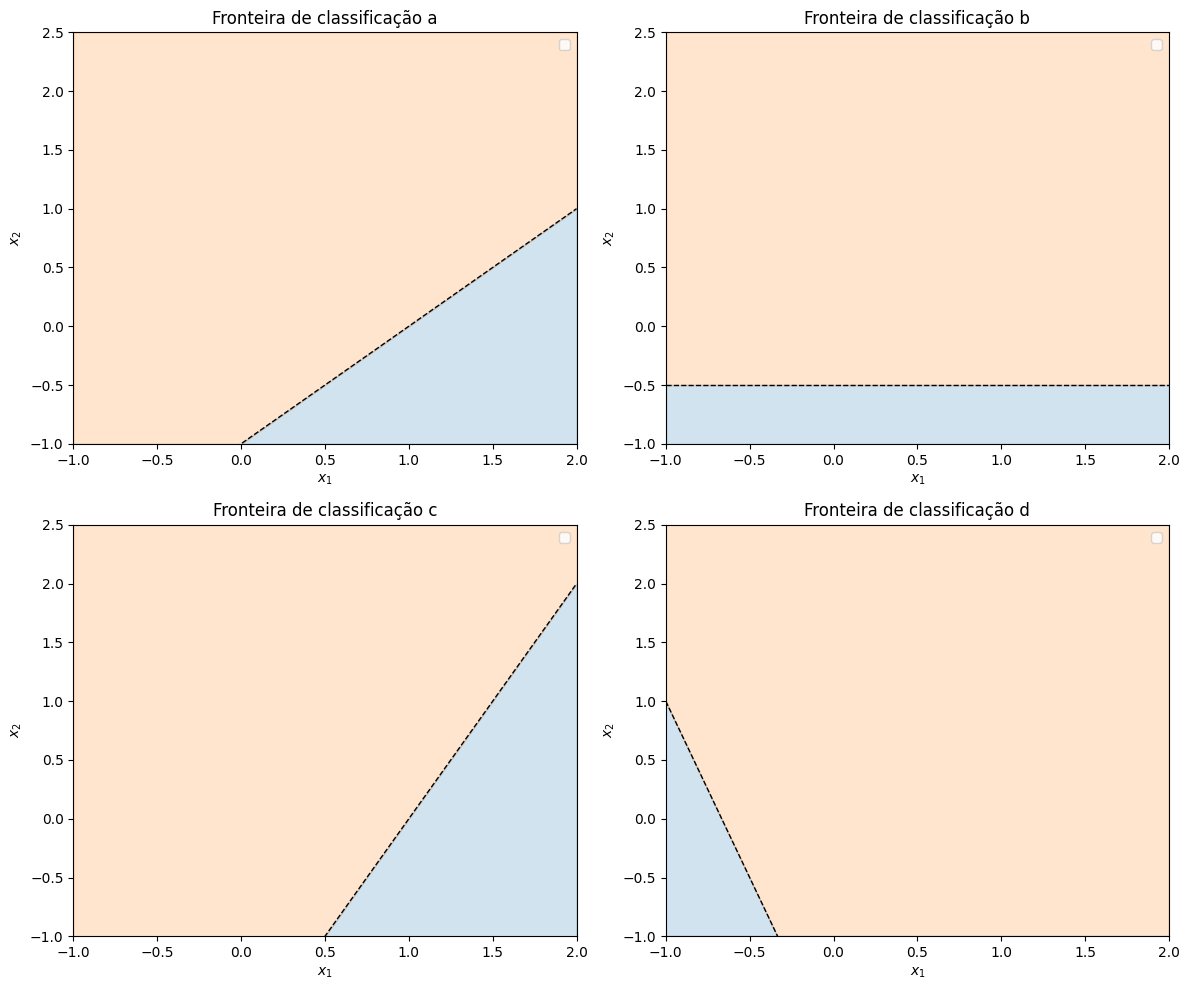

In [36]:
import numpy as np
import matplotlib.pyplot as plt

param = [
    (np.array([1, -1]), -1),
    (np.array([0, 2]), 1),
    (np.array([2, -1]), -2),
    (np.array([-3, -1]), -2)
]

xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  

for i, (w, b) in enumerate(param):
    w1, w2 = w
    c = -b / w2
    m = -w1 / w2
    
    xd = np.array([xmin, xmax])
    yd = m * xd + c
    
    ax = axes[i]
    ax.plot(xd, yd, lw=1, ls="--", color="black")
    ax.fill_between(xd, yd, ymin, color="tab:blue", alpha=0.2)
    ax.fill_between(xd, yd, ymax, color="tab:orange", alpha=0.2)
    
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.legend()
    ax.set_title(f"Fronteira de classificação {chr(ord('a') + i)}")

plt.tight_layout()
plt.show()

## Questão 3



In [1]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

num_train_images = len(trainset)
num_test_images = len(testset)
total_images = num_train_images + num_test_images
image_shape = trainset[0][0].shape
classes = trainset.classes

print(f"Número total de imagens: {total_images}")
print(f"Número de imagens de treinamento: {num_train_images}")
print(f"Número de imagens de teste: {num_test_images}")
print(f"Dimensões das imagens: {image_shape}")
print(f"Classes presentes no conjunto de dados: {classes}")

Número total de imagens: 70000
Número de imagens de treinamento: 60000
Número de imagens de teste: 10000
Dimensões das imagens: torch.Size([1, 28, 28])
Classes presentes no conjunto de dados: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


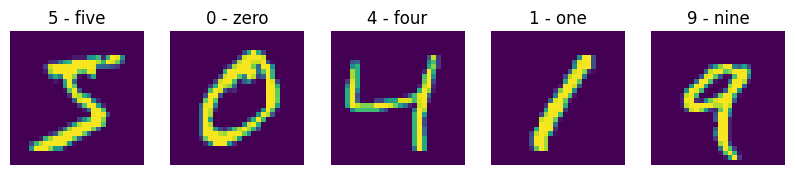

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch 

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")

transform = transforms.Compose([
    transforms.ToTensor(),
])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle=False)

dataiter = iter(trainloader)
images, labels = next(dataiter)

classes = trainset.classes

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    imshow(images[i])
    plt.title(classes[labels[i]])
    plt.axis("off")

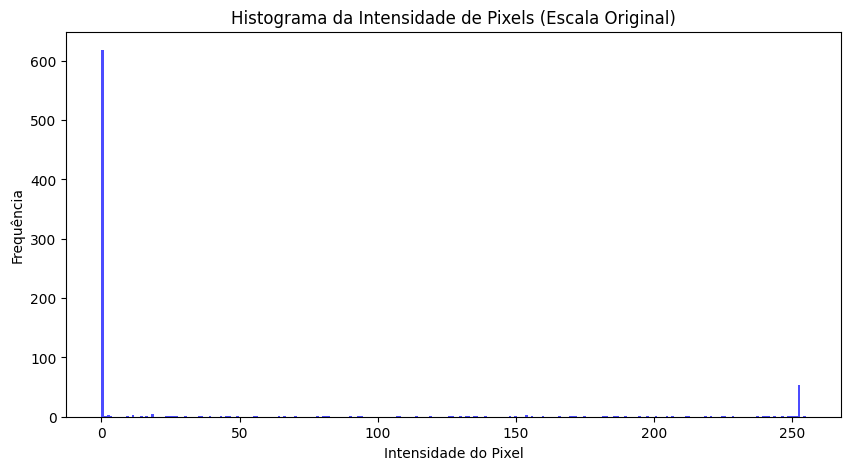

In [23]:
image, label = trainset[0]
image = image.numpy().squeeze()
escala_original = (image * 255).astype(int)
plt.figure(figsize=(10, 5))
plt.hist(escala_original.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title("Histograma da Intensidade de Pixels (Escala Original)")
plt.xlabel("Intensidade do Pixel")
plt.ylabel("Frequência")
plt.show()

As imagens originais do conjunto MNIST possuem intensidades variando de 0 a 255. Para que tenhamos pixels pertencente ao intervalo $[0, 1]$ e mantendo a frequência de zeros, pode-se dividir os valores por 255. (Os dados obtidos pela biblioteca torchvision já estão reescalonados)

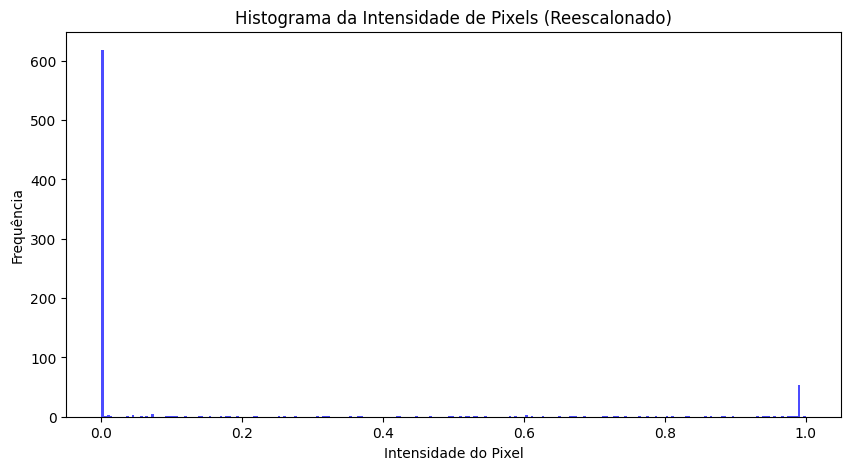

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.7)
plt.title("Histograma da Intensidade de Pixels (Reescalonado)")
plt.xlabel("Intensidade do Pixel")
plt.ylabel("Frequência")
plt.show()

In [2]:
%run 'item_c.py'

Learning Rate: 2
RedeBase(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 66.0547
Epoch 1/5, Test Accuracy: 10.13%
Epoch: 2/5, Loss: 3.0089
Epoch 2/5, Test Accuracy: 10.13%
Epoch: 3/5, Loss: 2.5022
Epoch 3/5, Test Accuracy: 10.36%
Epoch: 4/5, Loss: 2.5076
Epoch 4/5, Test Accuracy: 10.36%
Epoch: 5/5, Loss: 2.5106
Epoch 5/5, Test Accuracy: 9.62%


In [3]:
%run 'item_c.py'

Learning Rate: 1
RedeBase(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 25.2400
Epoch 1/5, Test Accuracy: 11.61%
Epoch: 2/5, Loss: 2.8192
Epoch 2/5, Test Accuracy: 11.35%
Epoch: 3/5, Loss: 2.4115
Epoch 3/5, Test Accuracy: 10.08%
Epoch: 4/5, Loss: 2.4101
Epoch 4/5, Test Accuracy: 9.58%
Epoch: 5/5, Loss: 2.4121
Epoch 5/5, Test Accuracy: 8.92%


In [5]:
%run 'item_c.py'

Learning Rate: 0.1
RedeBase(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 2.2686
Epoch 1/5, Test Accuracy: 16.05%
Epoch: 2/5, Loss: 2.3099
Epoch 2/5, Test Accuracy: 11.37%
Epoch: 3/5, Loss: 2.3137
Epoch 3/5, Test Accuracy: 10.30%
Epoch: 4/5, Loss: 2.3145
Epoch 4/5, Test Accuracy: 11.37%
Epoch: 5/5, Loss: 2.3130
Epoch 5/5, Test Accuracy: 10.30%


In [6]:
%run 'item_c.py'

Learning Rate: 0.01
RedeBase(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 0.3317
Epoch 1/5, Test Accuracy: 91.91%
Epoch: 2/5, Loss: 0.2588
Epoch 2/5, Test Accuracy: 94.25%
Epoch: 3/5, Loss: 0.2582
Epoch 3/5, Test Accuracy: 92.19%
Epoch: 4/5, Loss: 0.2450
Epoch 4/5, Test Accuracy: 94.37%
Epoch: 5/5, Loss: 0.2272
Epoch 5/5, Test Accuracy: 94.00%


In [8]:
%run 'item_d.py'

RedeBase(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 0.7078
Epoch 1/5, Test Accuracy: 88.25%
Epoch: 2/5, Loss: 0.7234
Epoch 2/5, Test Accuracy: 87.00%
Epoch: 3/5, Loss: 0.7435
Epoch 3/5, Test Accuracy: 88.89%
Epoch: 4/5, Loss: 0.7432
Epoch 4/5, Test Accuracy: 89.42%
Epoch: 5/5, Loss: 0.7414
Epoch 5/5, Test Accuracy: 90.27%
RedeBase(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 0.3287
Epoch 1/5, Test Accuracy: 92.68%
Epoch: 2/5, Loss: 0.2636
Epoch 2/5, Test Accuracy: 92.69%
Epoch: 3/5, Loss: 0.2526
Epoch 3/5, Test Accuracy: 93.26%
Epoch: 4/5, Loss: 0.2414
Epoch 4/5, Test Accuracy: 94.58%
Epoch: 5/5, Loss: 0.2383
Epoch 5/5, Test Accuracy: 93.39%
RedeBase(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=

In [12]:
%run 'item_e.py'

96.02
